In [1]:
from scipy.cluster.vq import vq, kmeans2
from scipy import *
import datetime
import csv
import numpy as np
import scipy.sparse.linalg
import pandas as pd

num_users = 1500001
num_items =  1358098
num_tests = 150000
num_clusters = 10

userid_to_index = {}
users_matrix = []
itemid_to_index = {}
items_matrix = []
clust_to_index = {}
test_user_id = []
test_user_index = []
interaction_matrix = scipy.sparse.lil_matrix((num_users, num_items))


print("Reading items_indicators.csv file ...")
items_rows = csv.reader(open('data/items_indicators.csv'), delimiter='\t')
next(items_rows)

print("Generating itemid to index list ...")
item_counter = 0
for row in items_rows:
    itemid_to_index[row[1]] = item_counter
    items_matrix.append(row)
    item_counter += 1
    if item_counter == num_items:
        break
index_to_items = {v: k for k, v in itemid_to_index.items()}

print("Generating items_matrix ...")
items_matrix_1 = np.array(items_matrix)
items_matrix_1[items_matrix_1 == ''] = '0'

#print("Clustering items data ...")

#centroids, item_clusts = kmeans2(np.delete(items_matrix_1, [0, 1, 2], 1).astype(float), num_clusters, minit='points')

Reading items_indicators.csv file ...
Generating itemid to index list ...
Generating items_matrix ...


In [23]:
items_rows = csv.reader(open('data/items_indicators.csv'), delimiter='\t')

In [3]:
def calculate_distortion(data, num_clusters):
    centroids, _ = kmeans2(data, num_clusters,minit='points')
    cluster_indices, _ = vq(data, centroids)
    distortion = np.sum((data - centroids[cluster_indices]) ** 2)
    return distortion

In [2]:
data = np.delete(items_matrix_1, [0, 1, 2,76,77], 1).astype(float)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px


#remember to scale your data if the ranges are too broad 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

num_clusters = 280
centroids, label = kmeans2(data, num_clusters,minit='points')

pca_model = PCA(n_components=2, random_state=42)
transformed = pca_model.fit_transform(scaled_features)
centers = pca_model.transform(centroids)

fig = px.scatter(x=transformed[:, 0], y=transformed[:, 1], color=label)
fig.show()

In [6]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(250, 380,2)
for kvalue in K:
    distortion = calculate_distortion(data, kvalue)
    distortions.append(distortion)

/opt/conda/lib/python3.9/site-packages/scipy/cluster/vq.py:603: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


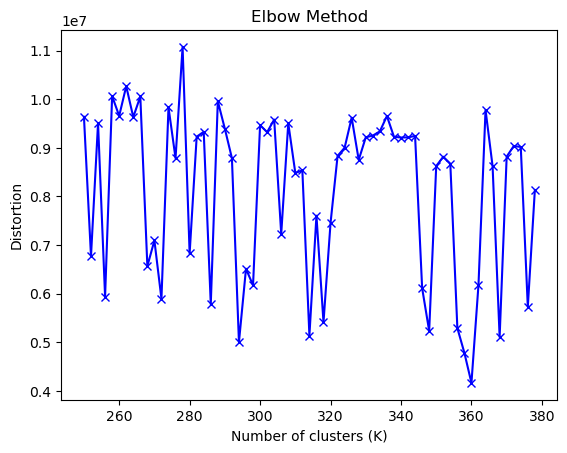

In [7]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

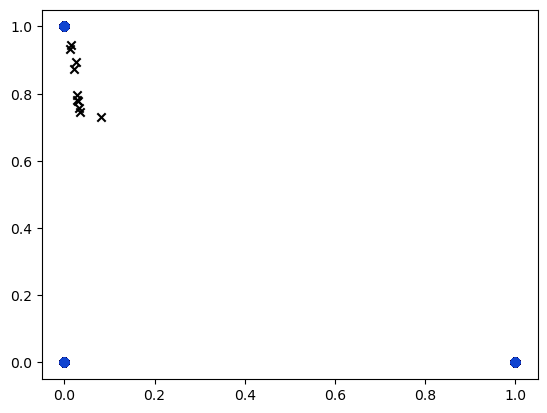

In [18]:
num_clusters = 10
centroids, label = kmeans2(data, num_clusters,minit='points')
cluster_indices, _ = vq(data, centroids)
#centroids, _ = kmeans2(data, num_clusters)
import random

# Generate random colors for each cluster
random.seed(42)
colors = ['#{:06x}'.format(random.randint(0, 256**3)) for _ in range(num_clusters)]

for i in range(num_clusters):
    cluster_points = data[cluster_indices == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], alpha=0.5)
    plt.scatter(centroids[i, 0], centroids[i, 1], c='k', marker='x')


In [2]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    print(k)
    # Building and fitting the model
    centroids, item_clusts = kmeans2(np.delete(items_matrix_1, [0, 1, 2], 1).astype(float), num_clusters, minit='points')
 
    distortions.append(sum(np.min(cdist( np.delete(items_matrix_1, [0, 1, 2], 1).astype(float) , centroids,
                                        'euclidean'), axis=1)) / items_matrix_1.shape[0])
   
 
    mapping1[k] = sum(np.min(cdist(np.delete(items_matrix_1, [0, 1, 2], 1).astype(float), centroids,
                                   'euclidean'), axis=1)) / items_matrix_1.shape[0]


In [ ]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

[Text(0.5, 0, 'Number of cluster'), Text(0, 0.5, 'SSE')]

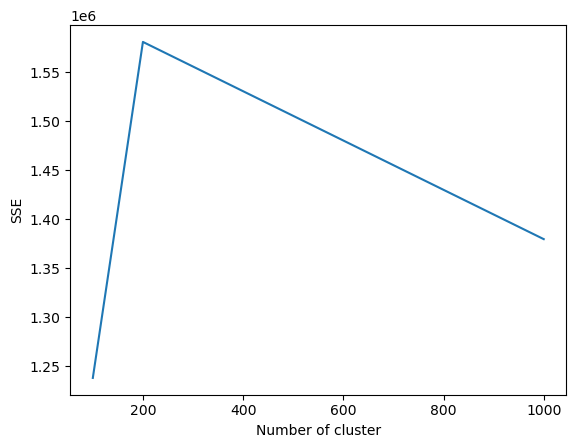

In [6]:
wcss = []
import seaborn as sns
from sklearn.cluster import KMeans
for i in range(500,100):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(data)
    wcss.append(clustering.inertia_)
    
ks = list((200, 1000,100))
plot = sns.lineplot(x = ks, y = wcss)
plot.set(xlabel = "Number of cluster",ylabel = "SSE")

[Text(0.5, 0, 'Number of cluster'), Text(0, 0.5, 'SSE')]

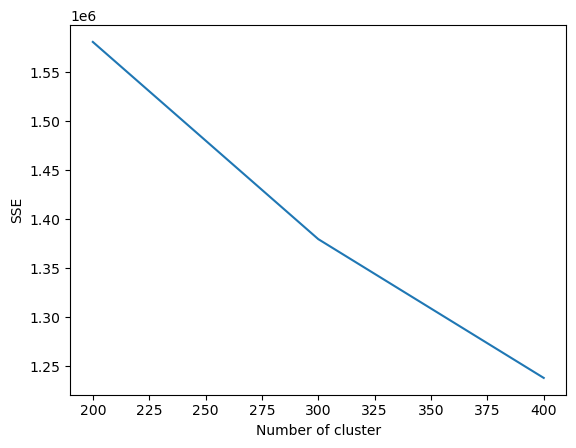

In [10]:
ks = [200,300,400]
plot = sns.lineplot(x = ks, y = wcss)
plot.set(xlabel = "Number of cluster",ylabel = "SSE")